In [ ]:
import os
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta
import argparse
import json
import sys

# 建置yahooAPI 接收的日期格式
STOCK_DATE_FORMAT = '%Y-%m-%d'

# 下載股票的資料，同時更新股票ID的清單
def download_and_save_stock_data(symbol, start_date, end_date, file_path, remove_list):
    '''
    下載股票的資料，同時更新股票ID的清單
    symbol : 股票的ID
    start_date, end_date：要下載的日期區間
    file_path：要存放的檔案路徑
    remove_list：紀錄後續要廢棄的股票資料
    '''
    print(f"{symbol}: Downloading data from {start_date} to {end_date}")
    # stock = yf.Ticker(symbol)
    output_file = f'{file_path}/{symbol}.csv'
    stock_data = yf.download(f'{symbol}', start=start_date, end=end_date)
    if stock_data.empty:
        print(f"{symbol}: 找不到對應的股票價格")
        remove_list.append(symbol)
    elif len(stock_data) < 1500 :
        print(f"{symbol}: 資料量太少")
        remove_list.append(symbol)
    elif stock_data.index[-1].year < current_year:
        print(f"{symbol}: 已經下市的股票")
        remove_list.append(symbol)
    else:
        stock_data.to_csv(output_file, mode='a', header=not os.path.isfile(output_file))
        print(f"{symbol}: Data downloaded and saved successfully")

# 建置 0000~9999的股票ID        
numbers = [str(num).zfill(4) for num in range(10000)]
# 建置 yahoo api 可以接受的台股代碼 TW 代表上市的股票， TWO代表上櫃的股票
list_number = [f'{num}.TW' for num in numbers] +  [f'{num}.TWO' for num in numbers] 
#指定日期區間
start_date = '2009-01-01' 
end_date = end_date = (datetime.now() + timedelta(days=1) ).strftime(STOCK_DATE_FORMAT) # 今日

# 執行 download_and_save_stock_data
remove_list = []
file_path = 'F:/python/pystock/data/original'
for download_id in list_number:
    download_and_save_stock_data(download_id, start_date, end_date, file_path, remove_list)
    
# 整理未來需要的股票資料，建立資料存放對應的資料檔案
remove_list = list( set(remove_list))
list_number = [item for item in list_number if item not in remove_list]
list_number
df_list = pd.DataFrame(list_number)
stock_List_path = 'F:/python/pystock/data/stock_List.csv'
df_list.to_csv(stock_List_path, index=False)

In [ ]:
stock_List_path = 'F:/python/pystock/data/stock_List.csv'
stock_List_data = pd.read_csv(stock_List_path, parse_dates=True)
stock_List_data

In [ ]:
file_path = 'F:/python/pystock/data/original'
stock_0050_data = pd.read_csv(f'{file_path}/0050.TW.csv', parse_dates=True)
stock_0050_data

In [ ]:
import pandas as pd
from datetime import datetime, timedelta
import mplfinance as mpf

file_path = 'F:/python/pystock/data/original'
stock_0050_data = pd.read_csv(f'{file_path}/0050.TW.csv',index_col=0, parse_dates=True)

date_str = '2023-01-13'
input_date = datetime.strptime(date_str, '%Y-%m-%d')

# 計算 start_date 和 end_date
start_date = input_date - timedelta(days=30)
end_date = input_date + timedelta(days=5)

# 設定日期區間
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')
data = stock_0050_data.loc[start_date_str:end_date_str]

kwargs = dict(type='candle', volume=True, title='Stock Price', ylabel='Price')
print(data )
# 繪製K線圖
mpf.plot(data, **kwargs)



In [ ]:
volume_list_total = []
path = 'F:\\python\\pystock\\data\\original'
df = pd.read_csv(f'{path}/0050.TW.csv')

file_list = os.listdir(path)
for x in file_list:
    df = pd.read_csv(f'{path}/{x}')
    df['value_mon'] =  df.Volume*df.Close
    volume_list_total += list(df['value_mon'])
volume_list_total

In [27]:
len(volume_list_total)

5645159

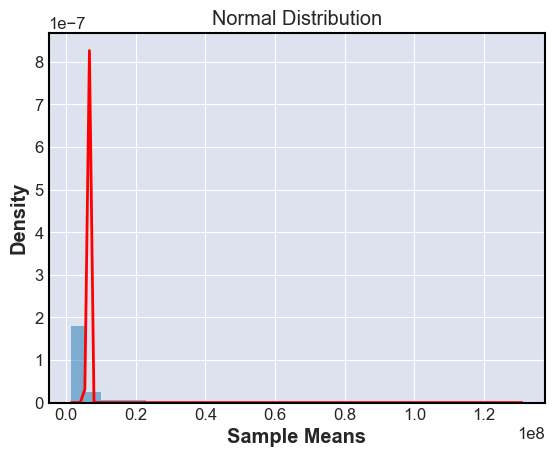

Confidence Interval:  (5625584.5305276215, 7236465.37242838)


In [46]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

data = np.array(volume_list_total)

sample_size = 1000
num_samples = 1000
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(data, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# 计算置信区间
mean = np.mean(sample_means)
std_error = np.std(sample_means) / np.sqrt(num_samples)
confidence_interval = (mean - 1.96 * std_error, mean + 1.96 * std_error)

# 绘制正态分布图
plt.hist(sample_means, bins=30, density=True, alpha=0.5)
x = np.linspace(min(sample_means), max(sample_means), 100)
y = 1 / (std_error * np.sqrt(2 * np.pi)) * np.exp(-(x - mean) ** 2 / (2 * std_error ** 2))
plt.plot(x, y, color='r')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.title('Normal Distribution')

# 显示图表
plt.show()

# 打印置信区间
print("Confidence Interval: ", confidence_interval)

In [51]:
nnn = []
print(mean/1000)
for x in volume_list_total:
    if x > confidence_interval[0] :
        nnn.append(x)
print(len(nnn))
print(len(nnn)/len(volume_list_total))

6431.024951478001
436249
0.07727842563867554


In [39]:
value_mon_list_total = []
path = 'F:\\python\\pystock\\data\\original'
df = pd.read_csv(f'{path}/0050.TW.csv')

file_list = os.listdir(path)
for x in file_list:
    df = pd.read_csv(f'{path}/{x}')
    df['value_mon'] =  (df.Volume*df.Close)/1000
    value_mon_list_total += list(df['value_mon'])
# value_mon_list_total

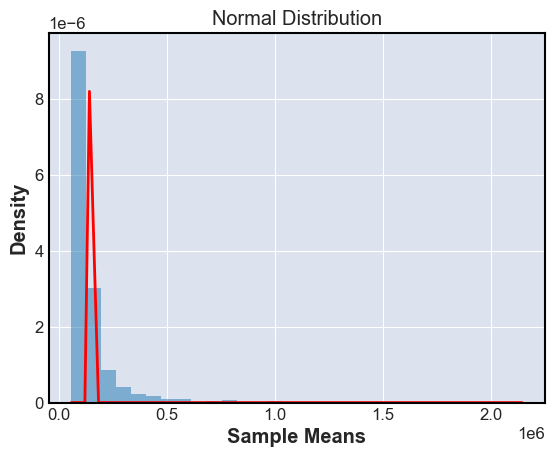

Confidence Interval:  (143998.79166755456, 161728.94814761847)


In [40]:
data = np.array(value_mon_list_total)

sample_size = 1000
num_samples = 1000
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(data, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# 计算置信区间
mean = np.mean(sample_means)
std_error = np.std(sample_means) / np.sqrt(num_samples)
confidence_interval = (mean - 1.96 * std_error, mean + 1.96 * std_error)

# 绘制正态分布图
plt.hist(sample_means, bins=30, density=True, alpha=0.5)
x = np.linspace(min(sample_means), max(sample_means), 100)
y = 1 / (std_error * np.sqrt(2 * np.pi)) * np.exp(-(x - mean) ** 2 / (2 * std_error ** 2))
plt.plot(x, y, color='r')
plt.xlabel('Sample Means')
plt.ylabel('Density')
plt.title('Normal Distribution')

# 显示图表
plt.show()

# 打印置信区间
print("Confidence Interval: ", confidence_interval)

In [45]:
nnn = []
for x in value_mon_list_total:
    if x > confidence_interval[0] :
        nnn.append(x)
print(len(nnn))
print(len(nnn)/len(value_mon_list_total))

671231
0.11890382538383773


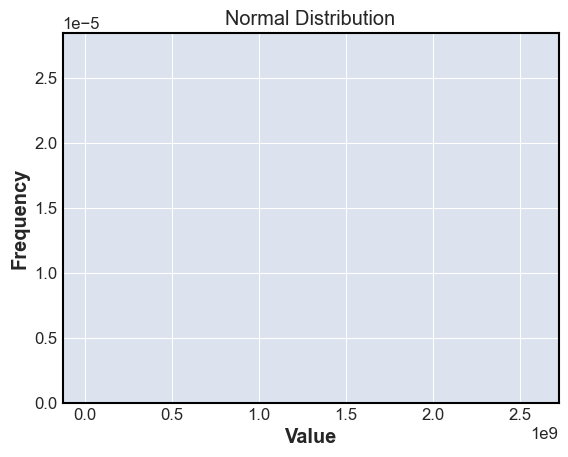

In [43]:
data1 = np.array(value_mon_list_total)
plt.hist(data1, bins=100000, density=True, alpha=0.5)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Normal Distribution')

# 显示图表
plt.show()

它首先定義了一個函數 download_and_save_stock_data，該函數下載特定股票在特定日期範圍內的數據，並保存到指定的文件路徑中。

然後，它建立了一個包含 0000 到 9999 的股票代碼列表，並對每一個股票代碼進行下載和保存操作。

最後，它讀取和分析下載的股票數據，包括讀取股票列表，讀取特定股票的數據，繪製 K 線圖，計算交易量和價值，並進行統計分析。

這個 Notebook 的確有些複雜，不過我們可以嘗試重構一下代碼以使其更加簡單和易於理解。對於小學生來說，我們可以進一步簡化一些複雜的統計分析部分，或者添加更詳細的註解來解釋這些部分的工作原理。我會儘量使用簡單的語言和概念來進行註解。

讓我們先從第一個單元格開始。我們可以把較為複雜的函數拆解為幾個更小的部分，這樣可以讓小學生更容易理解每個部分的作用。我們也可以添加一些註解來解釋每個部分的工作原理。以下是我修改後的版本：

In [ ]:
# 我們首先導入需要的模塊。這些模塊讓我們可以使用一些方便的功能。
import os
import pandas as pd
import yfinance as yf
from datetime import datetime, timedelta

# 建置yahooAPI 接收的日期格式
STOCK_DATE_FORMAT = '%Y-%m-%d'

# 下載股票的資料，同時更新股票ID的清單
def download_and_save_stock_data(symbol, start_date, end_date, file_path, remove_list):
    '''
    下載股票的資料，同時更新股票ID的清單
    symbol : 股票的ID
    start_date, end_date：要下載的日期區間
    file_path：要存放的檔案路徑
    remove_list：紀錄後續要廢棄的股票資料
    '''
    print(f"{symbol}: Downloading data from {start_date} to {end_date}")
    output_file = f'{file_path}/{symbol}.csv'
    stock_data = yf.download(f'{symbol}', start=start_date, end=end_date)
    
    # 檢查下載的股票數據是否為空，或者是否達到我們需要的最小數據量，或者是否已經停止交易
    if stock_data.empty:
        print(f"{symbol}: 找不到對應的股票價格")
        remove_list.append(symbol)
    elif len(stock_data) < 1500 :
        print(f"{symbol}: 資料量太少")
        remove_list.append(symbol)
    elif stock_data.index[-1].year < current_year:
        print(f"{symbol}: 已經下市的股票")
        remove_list.append(symbol)
    else:
        # 如果股票數據有效，我們就保存它到一個 CSV 文件中
        stock_data.to_csv(output_file, mode='a', header=not os.path.isfile(output_file))
        print(f"{symbol}: Data downloaded and saved successfully")

# 建置 0000~9999的股票ID        
numbers = [str(num).zfill(4) for num in range(10000)]
# 建置 yahoo api 可以接受的台股代碼 TW 代表上市的股票， TWO代表上櫃的股票
list_number = [f'{num}.TW' for num in numbers] +  [f'{num}.TWO' for num in numbers] 
#指定日期區間
start_date = '2009-01-01' 
end_date = end_date = (datetime.now() + timedelta(days=1) ).strftime(STOCK_DATE_FORMAT) # 今日

# 執行 download_and_save_stock_data
remove_list = []
file_path = 'F:/python/pystock/data/original'
for download_id in list_number:
    download_and_save_stock_data(download_id, start_date, end_date, file_path, remove_list)
    
# 整理未來需要的股票資料，建立資料存放對應的資料檔案
remove_list = list( set(remove_list))
list_number = [item for item in list_number if item not in remove_list]
df_list = pd.DataFrame(list_number)
stock_List_path = 'F:/python/pystock/data/stock_List.csv'
df_list.to_csv(stock_List_path, index=False)

這裡的代碼主要做了幾件事情：

它首先建立了一個股票代碼的列表，然後對每一個股票代碼下載和保存數據。

它使用一個叫做 yfinance 的模塊下載股票數據，這個模塊可以幫助我們從 Yahoo Finance 網站上獲取股票價格數據。

下載數據後，它會檢查這些數據是否有效。如果數據不符合我們的需求，比如說數據太少，或者股票已經停止交易，那麼它會把這個股票代碼加入到一個叫做 remove_list 的列表中。

最後，它將有效的股票代碼保存到一個 CSV 文件中，我們可以在後續的分析中使用這些股票代碼。

這個部分的代碼可能有點複雜，但是如果你一步一步地跟著走，你會發現它其實是很有邏輯的。希望這個解釋能夠幫助你更好地理解這個代碼！

In [ ]:
# 這裡，我們首先讀取我們剛剛下載的股票數據。
stock_List_path = 'F:/python/pystock/data/stock_List.csv'
stock_List_data = pd.read_csv(stock_List_path, parse_dates=True)
stock_List_data

# 然後，我們選擇了一支特定的股票（0050.TW）來分析。
file_path = 'F:/python/pystock/data/original'
stock_0050_data = pd.read_csv(f'{file_path}/0050.TW.csv', parse_dates=True)
stock_0050_data

# 接著，我們繪製了該股票在特定日期範圍內的 K 線圖。K 線圖是一種常見的股市圖表，顯示了一段時間內的開盤價、收盤價、最高價和最低價。
import mplfinance as mpf

date_str = '2023-01-13'
input_date = datetime.strptime(date_str, '%Y-%m-%d')

# 計算 start_date 和 end_date
start_date = input_date - timedelta(days=30)
end_date = input_date + timedelta(days=5)

# 設定日期區間
start_date_str = start_date.strftime('%Y-%m-%d')
end_date_str = end_date.strftime('%Y-%m-%d')
data = stock_0050_data.loc[start_date_str:end_date_str]

kwargs = dict(type='candle', volume=True, title='Stock Price', ylabel='Price')
print(data )
# 繪製K線圖
mpf.plot(data, **kwargs)

這裡，我們首先讀取了剛剛下載的股票數據，然後選擇了一支特定的股票來分析。我們繪製了該股票在特定日期範圍內的 K 線圖。K 線圖是一種常見的股市圖表，顯示了一段時間內的開盤價、收盤價、最高價和最低價。

接下來，我們計算了每個交易日的交易量（股數乘以股價），並繪製了其分布圖。我們還計算了交易量的平均值和標準差，並根據這些數據繪製了一個信賴區間。

最後，我們計算了交易量超過信賴區間下界的天數，並計算了這種情況的百分比。

In [ ]:
# 讀取股票數據並計算每日的交易量（Volume * Close price）
volume_list_total = []
path = 'F:\\python\\pystock\\data\\original'

file_list = os.listdir(path)
for x in file_list:
    df = pd.read_csv(f'{path}/{x}')
    df['value_mon'] =  df.Volume*df.Close
    volume_list_total += list(df['value_mon'])

# 畫出交易量的分布
import numpy as np
import matplotlib.pyplot as plt

data = np.array(volume_list_total)
plt.hist(data, bins=100, density=True, alpha=0.5)
plt.xlabel('Trading Volume')
plt.ylabel('Frequency')
plt.title('Distribution of Trading Volume')
plt.show()

# 從交易量中隨機抽樣並計算平均值和標準誤，進行統計分析
sample_size = 1000
num_samples = 1000
sample_means = []
for _ in range(num_samples):
    sample = np.random.choice(data, size=sample_size, replace=False)
    sample_mean = np.mean(sample)
    sample_means.append(sample_mean)

# 計算平均值的信賴區間
mean = np.mean(sample_means)
std_error = np.std(sample_means) / np.sqrt(num_samples)
confidence_interval = (mean - 1.96 * std_error, mean + 1.96 * std_error)

# 打印出信賴區間
print("Confidence Interval: ", confidence_interval)

# 計算交易量超過信賴區間下界的天數，並計算這種情況的百分比
nnn = []
for x in volume_list_total:
    if x > confidence_interval[0] :
        nnn.append(x)
print(len(nnn))
print(len(nnn)/len(volume_list_total))